In [56]:
import MySQLdb
import datetime
import json
import pandas as pd
import math
import urllib.request 
from IPython.display import Image
import numpy as np

In [2]:
Earth_radius = 6378137
Gmap_tile_size = 256
Gmap_scale = 2
Dpi = 96
Inch_meter = 39.37
Img_px_x = 640
Img_px_y = 640



In [3]:
with open('./credentials.json') as f:
    data = json.load(f)
    username = data['username']
    password = data['password']
    
db = MySQLdb.connect(host="localhost", user=username, passwd=password, db="bbxais_development" )

query1 = "select * from s57objs where f_class IN ('BRIDGE', 'BOYLAT', 'SMCFAC', 'LIGHTS', 'WRECK')"

data = pd.read_sql(query1, con=db)
data.head()

,id,f_class,latitude,longitude,chart_name,tags,created_at,updated_at,lnam
0,4,BRIDGE,37.9431,-122.515,US5CA21M,"{""CATBRG"": ""1"", ""SORDAT"": ""19990316"", ""SORIND""...",2017-12-17 00:00:25,2017-12-17 00:00:25,0226166286990DC8
1,5,BRIDGE,37.9345,-122.435,US5CA21M,"{""CATBRG"": ""1"", ""OBJNAM"": ""Richmond - San Rafa...",2017-12-17 00:00:25,2017-12-17 00:00:25,02261662868E0DC8
2,6,BRIDGE,37.8827,-122.519,US5CA21M,"{""CATBRG"": ""1"", ""SCAMIN"": 59999, ""SORIND"": ""US...",2017-12-17 00:00:25,2017-12-17 00:00:25,02260000756A0001
3,7,BRIDGE,37.9394,-122.464,US5CA21M,"{""CATBRG"": ""1"", ""OBJNAM"": ""Richmond - San Rafa...",2017-12-17 00:00:25,2017-12-17 00:00:25,02261662868C0DC8
4,8,BRIDGE,37.9090,-122.329,US5CA21M,"{""CATBRG"": ""1"", ""SCAMIN"": 59999, ""SORDAT"": ""19...",2017-12-17 00:00:25,2017-12-17 00:00:25,0226166286AB0DC8


In [62]:
size=len(data)
print(size)

59716


In [64]:
a=np.random.randint(size, size = 20)

In [67]:
sample = data.loc[ np.random.randint(size, size = 20), ['f_class','latitude','longitude']]
sample

,f_class,latitude,longitude
5201,BRIDGE,40.1877,-74.0102
6576,BRIDGE,31.0886,-81.4796
2692,LIGHTS,29.7253,-91.8623
23351,LIGHTS,42.4349,-82.8688
10619,LIGHTS,44.8271,-87.3574
48477,LIGHTS,30.7142,-81.3105
29247,BRIDGE,42.9983,-78.9369
53126,BOYLAT,36.8593,-76.3373
24780,LIGHTS,35.2159,-76.5935
2861,BOYLAT,29.4096,-93.3164


In [68]:
klass, c_lat, c_lng = sample.loc[ 8945, ['f_class','latitude','longitude']]
print(klass, c_lat, c_lng)

KeyError: 'the label [8945] is not in the [index]'

In [45]:
zoom = 19

earth_circ = Earth_radius * 2* math.pi
k = earth_circ / Gmap_tile_size
mt_pixel = k * math.cos(c_lat*math.pi/180)/(2**zoom) / Gmap_scale
img_x = Img_px_x * Gmap_scale
img_y = Img_px_y * Gmap_scale


scale = mt_pixel * Inch_meter * Dpi
deg_px_lat = mt_pixel / earth_circ * 360
deg_px_lng = mt_pixel / (earth_circ * math.cos(c_lat*math.pi/180) ) * 360
d_lat = img_x / 2 * deg_px_lat
d_lng = img_y / 2 * deg_px_lng
n_lat = c_lat + d_lat
s_lat = c_lat - d_lat
w_lng = c_lng - d_lng
e_lng = c_lng + d_lng

In [46]:
gmap_size = "%sx%s"%(Img_px_x, Img_px_y)
url = "https://maps.googleapis.com/maps/api/staticmap?center=%s,%s&zoom=%s&scale=%s&size=%s&maptype=satellite"%(c_lat,c_lng,zoom, Gmap_scale, gmap_size )
url

'https://maps.googleapis.com/maps/api/staticmap?center=39.1331,-76.0517&zoom=19&scale=2&size=640x640&maptype=satellite'

In [47]:
file_name = 'test_img_gl.png'

f = open(file_name,'wb')
# urllib.request.urlretrieve("http://www.gunnerkrigg.com//comics/00000001.jpg", file_name)

urllib.request.urlretrieve(url, file_name)
    

('test_img_gl.png', <http.client.HTTPMessage at 0x7fd4e9714ef0>)

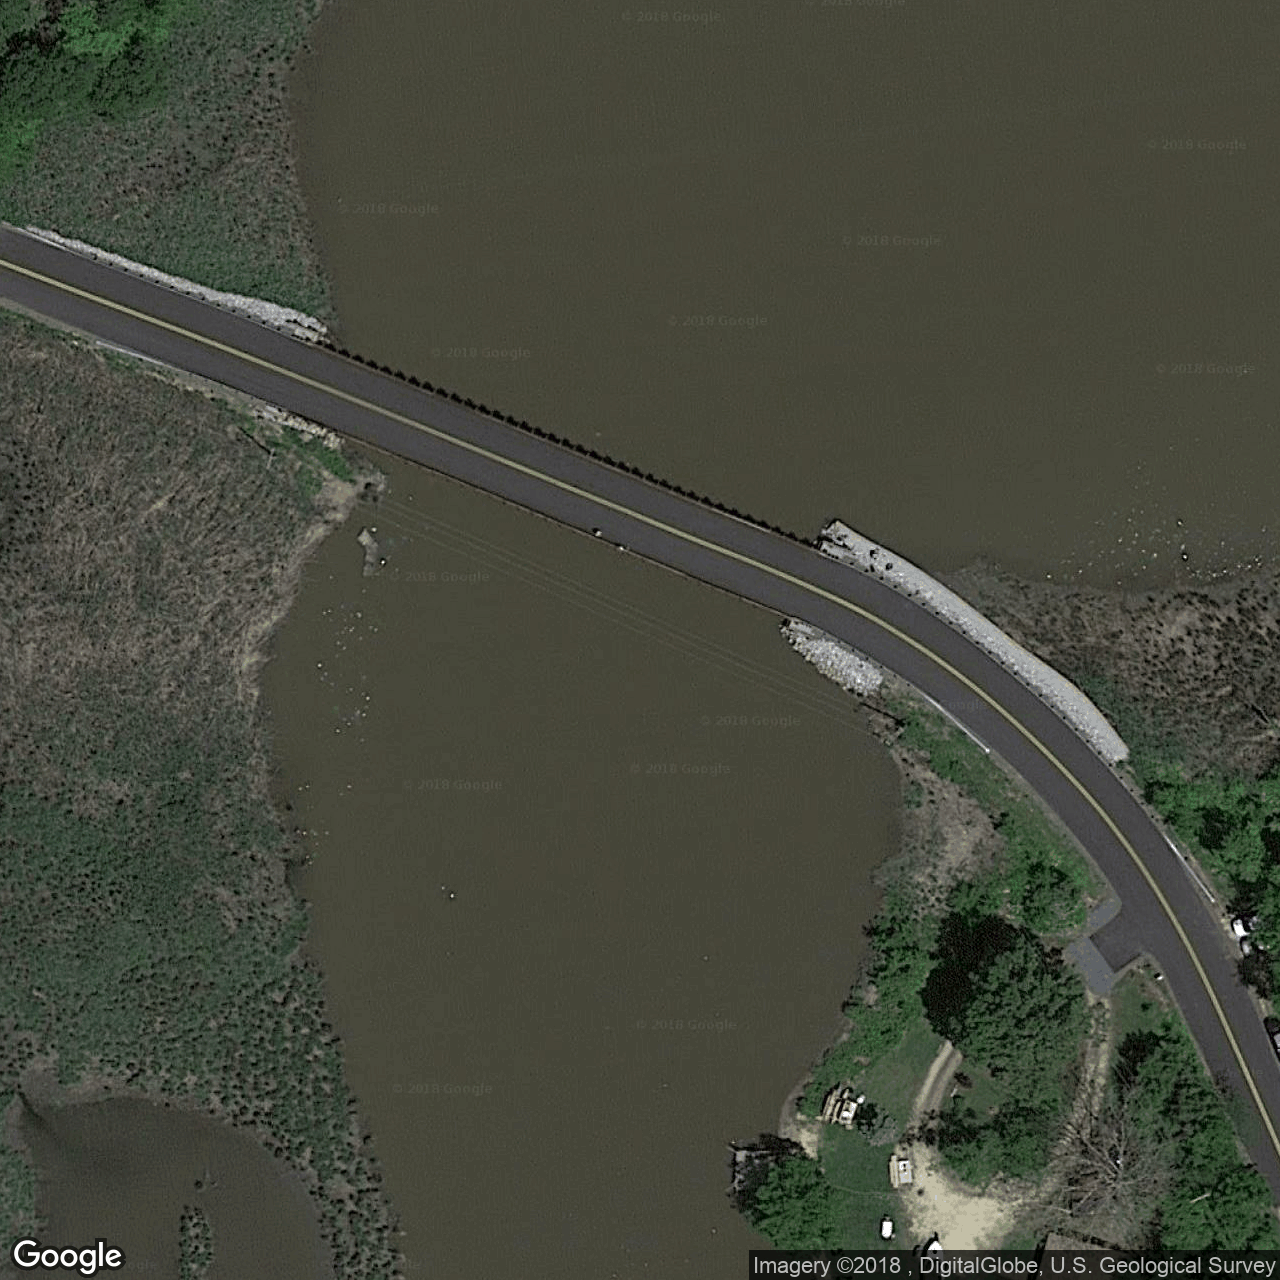

In [48]:

Image(filename=file_name) 

In [49]:
# for index, row in data.iterrows():
#     print(index, row['latitude'],row['longitude'])
    
    
    

SyntaxError: invalid syntax (<ipython-input-49-2c345aa94e5d>, line 4)